<a href="https://colab.research.google.com/github/skaty5678/Book-recommendation-system/blob/main/Book_Recommendation_System_SANJEEV_KUMAR_THAKUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
raw_books = pd.read_csv('/content/drive/MyDrive/Books dataset/Copy of Books.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [104]:
raw_users = pd.read_csv('/content/drive/MyDrive/Books dataset/Copy of Users.csv')

In [105]:
raw_ratings = pd.read_csv('/content/drive/MyDrive/Books dataset/Copy of Ratings.csv')

#**BOOKS**

In [106]:
raw_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [287]:
books = raw_books.copy()

In [288]:
books.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace = True)

In [289]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [290]:
dict = {'Book-Title': 'title',
        'Book-Author': 'author',
        'Year-Of-Publication': 'publication_year',
        'Publisher':'publisher'}

books.rename(columns=dict,inplace=True)

In [291]:
books.head()

,ISBN,title,author,publication_year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [292]:
books[books.isna().any(axis=1)]


,ISBN,title,author,publication_year,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [293]:
books.dropna(inplace=True) 


In [294]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ISBN              271357 non-null  object
 1   title             271357 non-null  object
 2   author            271357 non-null  object
 3   publication_year  271357 non-null  object
 4   publisher         271357 non-null  object
dtypes: object(5)
memory usage: 12.4+ MB


In [295]:
books['publication_year'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [296]:
books.loc[(books['publication_year'] == 'DK Publishing Inc') | (books['publication_year'] == 'Gallimard')]


,ISBN,title,author,publication_year,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [297]:
books.drop(books[books['publication_year'] == 'DK Publishing Inc'].index, inplace = True)
books.drop(books[books['publication_year'] == 'Gallimard'].index, inplace = True)

In [298]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ISBN              271354 non-null  object
 1   title             271354 non-null  object
 2   author            271354 non-null  object
 3   publication_year  271354 non-null  object
 4   publisher         271354 non-null  object
dtypes: object(5)
memory usage: 12.4+ MB


In [302]:
books['publication_year'] = books['publication_year'].astype('int')

In [303]:
print(sorted(books['publication_year'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [304]:
books['publication_year'].mean()

1959.7603794305594

In [305]:
books.loc[(books['publication_year'] == 0)].value_counts()


ISBN        title                             author            publication_year  publisher                
B0002K6K8O  The Underground City              Jules Verne       0                 Digireads.com                1
0553142070  Warriors Path                     Louis Lamour      0                 Bantam Doubleday Dell        1
0571141781  Devices and Desires               P D James         0                 Faber Faber Inc              1
0571142745  Buddha of Suburbia                Hanif Kureishi    0                 Faber Faber Inc              1
057114456X  Immortality                       Milan Kundera     0                 Faber Faber Inc              1
                                                                                                              ..
1853268348  Jane Eyre                         Charlotte Bronte  0                 Universal Sales Marketing    1
1853268356  Martin Chuzzlewit                 Charles Dickens   0                 Universal Sales Mar

In [306]:
books.loc[(books['publication_year'] == 0)] = np.nan

In [307]:
books['publication_year'].fillna((books['publication_year'].mean()), inplace=True)


In [308]:
books['publication_year'] = books['publication_year'].astype('int')

In [309]:
print(sorted(books['publication_year'].unique()))

[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [310]:
print(books['publication_year'].nunique())

115


In [311]:
books['publication_year'].value_counts()[:10]

2002    17626
1999    17431
2001    17358
2000    17232
1998    15766
1993    15220
1997    14890
2003    14358
1996    14030
1995    13545
Name: publication_year, dtype: int64

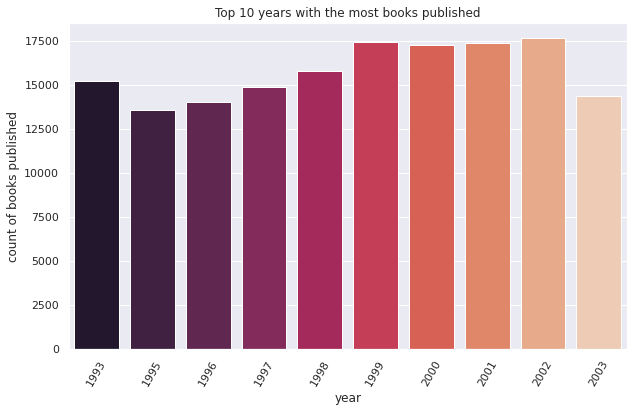

In [315]:
plt.subplots(figsize=(10,6))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['publication_year'].value_counts()[:10].index,y = books['publication_year'].value_counts()[:10].values,palette = 'rocket').set(title = 'Top 10 years with the most books published',xlabel = 'year',ylabel = 'count of books published')
plt.xticks(rotation = 60)
plt.show()

In [314]:
books['publisher'].value_counts()[:20]

Harlequin                   7535
Silhouette                  4220
Pocket                      3870
Ballantine Books            3764
Bantam Books                3642
Scholastic                  3157
Simon &amp; Schuster        2967
Penguin Books               2843
Berkley Publishing Group    2767
Penguin USA                 2715
Warner Books                2703
Harpercollins               2518
Fawcett Books               2257
Signet Book                 2067
Random House Inc            2045
St Martins Pr               1952
St. Martin's Press          1782
Tor Books                   1703
Zebra Books                 1694
HarperCollins Publishers    1690
Name: publisher, dtype: int64

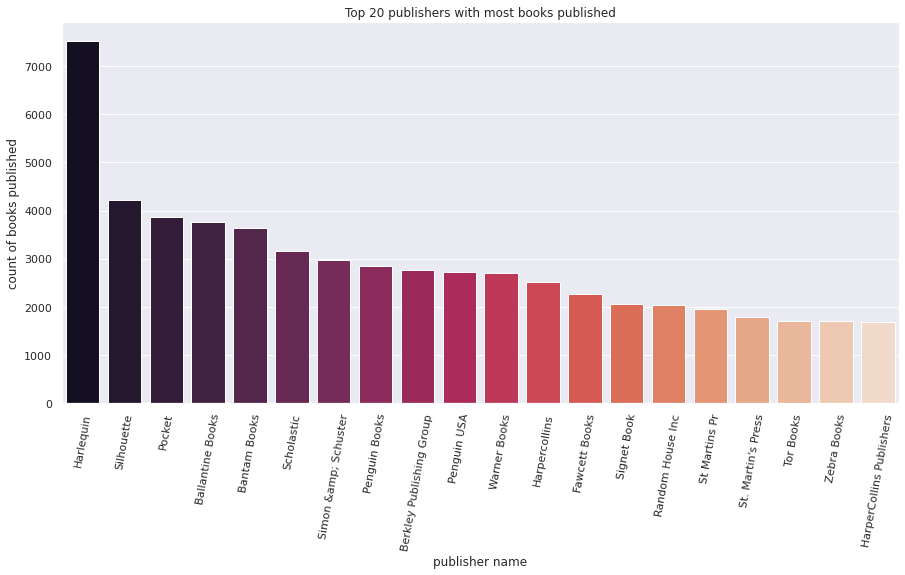

In [318]:
plt.subplots(figsize=(15,7))
sns.set_theme(style="darkgrid",context = 'notebook')
sns.barplot(x = books['publisher'].value_counts()[:20].index,y = books['publisher'].value_counts()[:20].values,palette = 'rocket').set(title = 'Top 20 publishers with most books published',xlabel = 'publisher name',ylabel = 'count of books published')
plt.xticks(rotation = 80)
plt.show()

#**USERS**

In [160]:
users = raw_users.copy()

In [161]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [162]:
print(sorted(users['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [163]:
users.loc[(users['Age'] < 5) | (users['Age'] > 85),'Age'] = np.nan

In [164]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       166762 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [165]:
users['Age'].fillna((users['Age'].mean()), inplace=True)


In [166]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [167]:
print(sorted(users['Age'].unique()))

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 34.71685995610511, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0]


In [168]:
users.Age.mean()

34.7168599561059

In [169]:
users['Age'] = users['Age'].astype('int')

In [170]:
users['Age'].value_counts()

34    116752
24      5687
25      5618
26      5547
23      5456
       ...  
82        25
83        24
84        22
6         18
85        17
Name: Age, Length: 81, dtype: int64

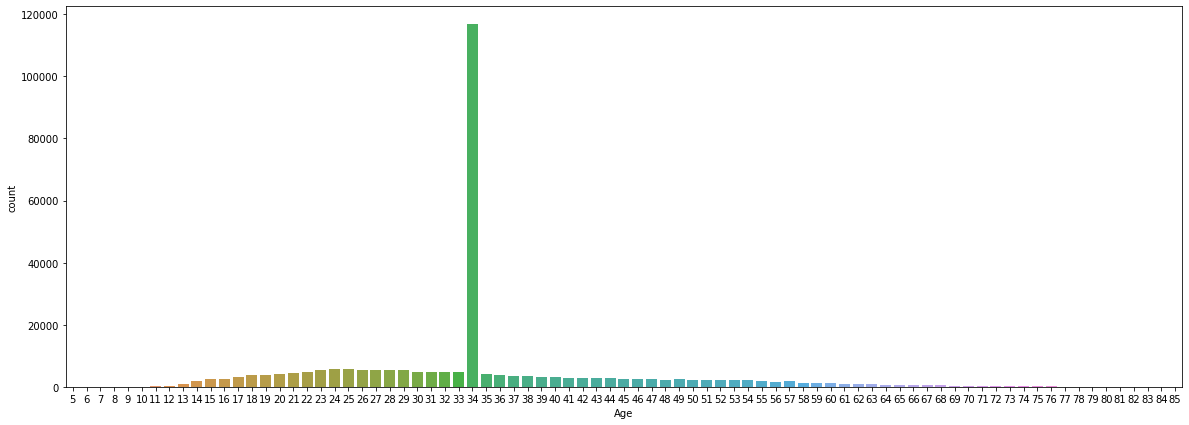

In [171]:
plt.figure(figsize=(20,7))
sns.countplot(data=users,x='Age')


#**RATINGS**

In [213]:
raw_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [224]:
ratings = raw_ratings.copy()

In [225]:
ratings['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [226]:
ratings.shape

(1149780, 3)

In [227]:
new_ratings = ratings[ratings['ISBN'].isin(books['ISBN'])]
new_ratings = new_ratings[new_ratings['User-ID'].isin(users['User-ID'])]


In [228]:
new_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [229]:
new_ratings.shape

(1031129, 3)

In [230]:
new_ratings = new_ratings.loc[new_ratings['Book-Rating'] != 0]

In [231]:
new_ratings.shape

(383838, 3)

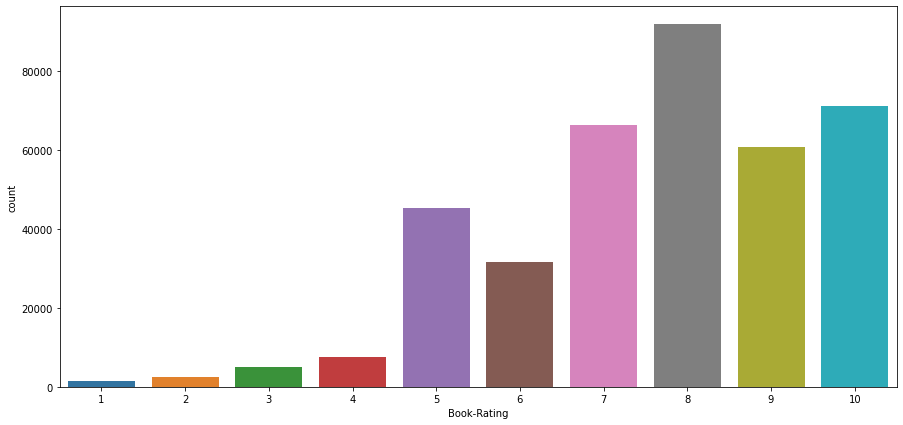

In [233]:
plt.figure(figsize=(15,7))
sns.countplot(data=new_ratings,x='Book-Rating')